In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('Kaagle_Upload.csv')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df_all[['journey_purpose_of_driver', 'accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week', 'age_of_driver', 'age_of_vehicle']]
print(df.shape)
df.head()

(285331, 14)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day_of_week,age_of_driver,age_of_vehicle
0,6,3,6,3,4,1,1,1,0,0,1,2,45,11
1,6,3,3,6,2,1,1,1,0,0,1,7,25,1
2,6,3,3,6,2,1,1,1,0,0,1,7,51,-1
3,1,3,6,0,-1,1,1,1,0,0,1,4,50,1
4,6,3,6,3,4,1,1,1,0,0,1,6,27,-1


In [4]:
# remove all -1 values as they indicate data is missing
df = df[df['age_of_vehicle'] != -1]
df = df[df['age_of_driver'] != -1]
df = df[df['day_of_week'] != -1]
df = df[df['urban_or_rural_area'] != 3]
df = df[df['carriageway_hazards'] != -1]
df = df[df['special_conditions_at_site'] != -1]
df = df[df['road_surface_conditions'] != -1]
df = df[df['weather_conditions'] != -1]
df = df[df['light_conditions'] != -1]
df = df[df['junction_control'] != -1]
df = df[df['junction_detail'] != -1]
df = df[df['road_type'] != -1]
df = df[df['journey_purpose_of_driver'] != -1]
df = df[df['accident_severity'] != -1]
df.shape


(110842, 14)

### Light Conditions

In [5]:
df_lcac = df[['light_conditions', 'accident_severity']]
df_lcac

,light_conditions,accident_severity
0,1,3
1,1,3
6,7,3
7,7,3
8,1,3
...,...,...
285307,1,3
285312,1,3
285313,1,3
285314,1,3


In [6]:
df_lcac['light_conditions'].value_counts()

1    82866
4    23832
6     2420
7     1272
5      452
Name: light_conditions, dtype: int64

In [7]:
df_lcac = df_lcac[df_lcac['light_conditions'] != 7]
df_lcac['light_conditions'].unique()

array([1, 4, 5, 6], dtype=int64)

In [8]:

df_lcac['light_conditions'].replace(1, 'daylight', inplace=True)
df_lcac['light_conditions'].replace(4, 'darkness w/lights lit', inplace=True)
df_lcac['light_conditions'].replace(5, 'darkness w/lights unlit', inplace=True)
df_lcac['light_conditions'].replace(6, 'darkness w/out lights', inplace=True)
df_lcac

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,light_conditions,accident_severity
0,daylight,3
1,daylight,3
8,daylight,3
12,darkness w/lights lit,3
13,daylight,3
...,...,...
285307,daylight,3
285312,daylight,3
285313,daylight,3
285314,daylight,3


In [9]:
df_lcac3 = df_lcac[df_lcac['accident_severity'] == 3]
df_lcac2 = df_lcac[df_lcac['accident_severity'] == 2]
df_lcac1 = df_lcac[df_lcac['accident_severity'] == 1]

print(df_lcac3['light_conditions'].unique())
print(df_lcac2['light_conditions'].unique())
print(df_lcac1['light_conditions'].unique())

['daylight' 'darkness w/lights lit' 'darkness w/lights unlit'
 'darkness w/out lights']
['daylight' 'darkness w/lights lit' 'darkness w/lights unlit'
 'darkness w/out lights']
['daylight' 'darkness w/lights lit' 'darkness w/lights unlit'
 'darkness w/out lights']


In [11]:
y3 = df_lcac3['light_conditions'].value_counts()
df_lcactot = pd.DataFrame({'accident severity 3': y3})
df_lcactot

,accident severity 3
daylight,72782
darkness w/lights lit,20588
darkness w/out lights,1855
darkness w/lights unlit,371


In [12]:
y2 = df_lcac2['light_conditions'].value_counts()
df_lcactot.insert(1, 'accident severity 2', y2, True)
df_lcactot

,accident severity 3,accident severity 2
daylight,72782,9495
darkness w/lights lit,20588,3044
darkness w/out lights,1855,486
darkness w/lights unlit,371,79


In [13]:
y1 = df_lcac1['light_conditions'].value_counts()
df_lcactot.insert(2, 'accident severity 1', y1, True)
df_lcactot

,accident severity 3,accident severity 2,accident severity 1
daylight,72782,9495,589
darkness w/lights lit,20588,3044,200
darkness w/out lights,1855,486,79
darkness w/lights unlit,371,79,2


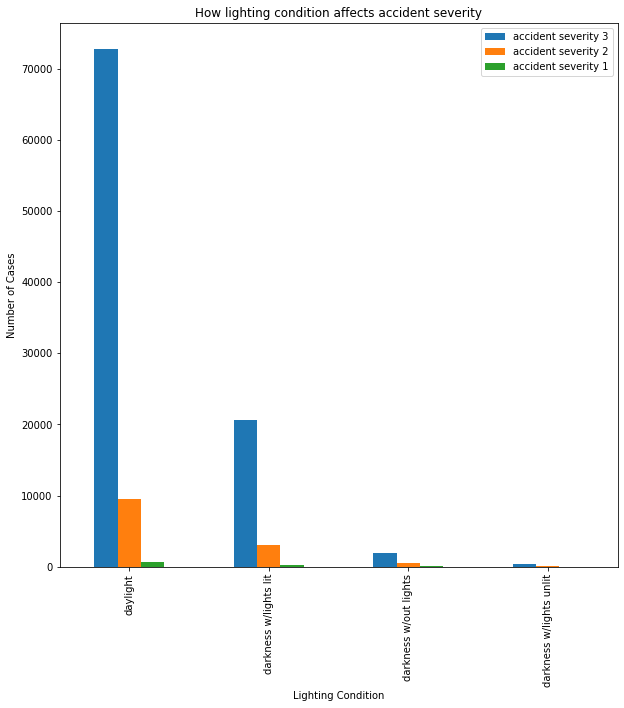

In [14]:
df_lcactot.plot(kind='bar', figsize=(10,10))

plt.xlabel('Lighting Condition')
plt.ylabel('Number of Cases')
plt.title('How lighting condition affects accident severity')
plt.show()